In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne

import ecogtools
from scipy.stats import ttest_ind

%matplotlib inline

mne.set_log_level(verbose=False)

In [2]:
patient_num1 = "2002"
channels1 = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

In [3]:
TR_times = {"tmin":-2., "tmax":1.}
TR_baseline = (0., 1.)

# Localizer Task 

In [4]:
data1 = ecogtools.ToM_Localizer(patient_num1)

# Get the times for task from behavioral data
tmin = int(data1.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data1.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data1.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data1.phys.load_data()
data1.phys.pick_channels(channels1)

data1.initialize_epochs_object(channels1, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [5]:
# Create evoked for Time of Response
belief_tr_evoked1 = data1.create_evoked("b/time_of_resp")
photo_tr_evoked1 = data1.create_evoked("p/time_of_resp")
TR_evoked1 = mne.combine_evoked([belief_tr_evoked1, photo_tr_evoked1], weights=[1, -1])

In [6]:
patient_num2 = "2003"
channels2 = ['LTG5', 'LTG6', 'LTG7', 'LTG8', 'LTG13', 'LTG14', 'LTG15', 'LTG16', 'LTG21', 'LTG22', 'LTG23', 'LTG24']

In [7]:
data2 = ecogtools.ToM_Localizer(patient_num2)

# Get the times for task from behavioral data
tmin = int(data2.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data2.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data2.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data2.phys.load_data()
data2.phys.pick_channels(channels2)

data2.initialize_epochs_object(channels2, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [8]:
# Create evoked for Time of Response
belief_tr_evoked2 = data2.create_evoked("b/time_of_resp")
photo_tr_evoked2 = data2.create_evoked("p/time_of_resp")
TR_evoked2 = mne.combine_evoked([belief_tr_evoked2, photo_tr_evoked2], weights=[1, -1])

In [9]:
patient_num3 = "2007"
channels3 = ['RFG5', 'RFG6', 'RFG7', 'RFG8', 'RFG13', 'RFG14', 'RFG15', 'RFG16', 'RFG21', 'RFG22', 'RFG23', 'RFG24']
#channels = ['RFG22', 'RFG23', 'RFG24', 'RFG30', 'RFG31', 'RFG32', 'RFG38', 'RFG39', 'RFG40', 'RFG46', 'RFG47', 'RFG48']

In [10]:
data3 = ecogtools.ToM_Localizer(patient_num3)

# Get the times for task from behavioral data
tmin = int(data3.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data3.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data3.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data3.phys.load_data()
data3.phys.pick_channels(channels3)

data3.initialize_epochs_object(channels3, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [11]:
# Create evoked for Time of Response
belief_tr_evoked3 = data3.create_evoked("b/time_of_resp")
photo_tr_evoked3 = data3.create_evoked("p/time_of_resp")
TR_evoked3 = mne.combine_evoked([belief_tr_evoked3, photo_tr_evoked3], weights=[1, -1])

# Figure 3

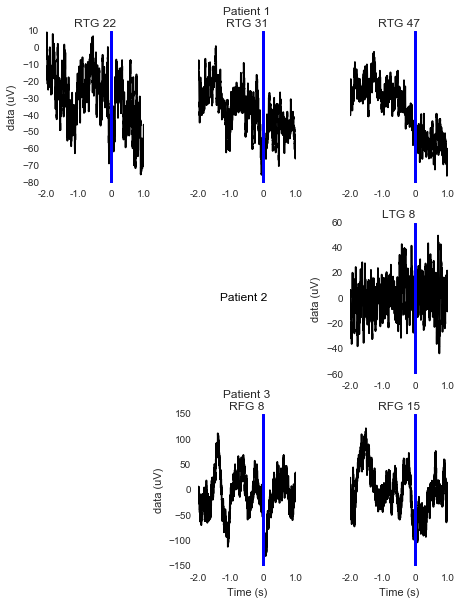

In [13]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(6.5, 8.5);

TR_evoked1.crop(**TR_times).plot([0], axes=axes[0,0], show=False);
TR_evoked1.crop(**TR_times).plot([4], axes=axes[0,1], show=False);
TR_evoked1.crop(**TR_times).plot([10], axes=axes[0,2], show=False);
TR_evoked2.crop(**TR_times).plot([3], axes=axes[1,2], show=False);
TR_evoked3.crop(**TR_times).plot([3], axes=axes[2,1], show=False);
TR_evoked3.crop(**TR_times).plot([6], axes=axes[2,2], show=False);

axes[0,0].set_title("RTG 22")
axes[0,1].set_title("Patient 1\nRTG 31")
axes[0,2].set_title("RTG 47")
axes[1,2].set_title("LTG 8")
axes[2,1].set_title("Patient 3\nRFG 8")
axes[2,2].set_title("RFG 15")
plt.figtext(0.475, 0.5, 'Patient 2', color='black', size='large')

axes[0,0].set_xticks([-2000, -1000, 0, 1000])
axes[0,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[0,1].set_xticks([-2000, -1000, 0, 1000])
axes[0,1].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[0,2].set_xticks([-2000, -1000, 0, 1000])
axes[0,2].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,2].set_xticks([-2000, -1000, 0, 1000])
axes[1,2].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[2,1].set_xticks([-2000, -1000, 0, 1000])
axes[2,1].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[2,2].set_xticks([-2000, -1000, 0, 1000])
axes[2,2].set_xticklabels([-2.0, -1.0, 0, 1.0])

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,2].set_xlabel("")
axes[1,2].set_xlabel("")
axes[2,1].set_xlabel("Time (s)")
axes[2,2].set_xlabel("Time (s)")

#axes[0,0].set_yticks(np.arange(80, 160, 10))
#axes[1,2].set_yticks(np.arange(80, 160, 10))
#axes[2,1].set_yticks(np.arange(80, 160, 10))
axes[0,1].set_yticks([])
axes[0,2].set_yticks([])
axes[1,0].set_yticks([])
axes[1,1].set_yticks([])
axes[2,0].set_yticks([])
axes[2,2].set_yticks([])

axes[0,1].set_ylabel("")
axes[0,2].set_ylabel("")
axes[2,2].set_ylabel("")

axes[0,0].axvline(x=0, linewidth=3)
axes[0,1].axvline(x=0, linewidth=3)
axes[0,2].axvline(x=0, linewidth=3)
axes[1,2].axvline(x=0, linewidth=3)
axes[2,1].axvline(x=0, linewidth=3)
axes[2,2].axvline(x=0, linewidth=3)

axes[1,0].set_xticklabels([])
axes[1,1].set_xticklabels([])
axes[2,0].set_xticklabels([])
axes[0,0].set_axis_bgcolor('white')
axes[0,1].set_axis_bgcolor('white')
axes[0,2].set_axis_bgcolor('white')
axes[1,0].set_axis_bgcolor('white')
axes[1,1].set_axis_bgcolor('white')
axes[1,2].set_axis_bgcolor('white')
axes[2,0].set_axis_bgcolor('white')
axes[2,1].set_axis_bgcolor('white')
axes[2,2].set_axis_bgcolor('white')

plt.tight_layout()
fig.savefig("F3-ERP Plots Loc.pdf")

# ToM and Attention Task 

In [14]:
data4 = ecogtools.ToM_2010(patient_num1)

# Get the times for task from behavioral data
tmin = int(data4.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data4.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data4.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data4.phys.load_data()
data4.phys.pick_channels(channels1)

# Create epochs object for trial viz and averaging.
data4.initialize_epochs_object(channels1, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [15]:
# Create evoked for Time of Response mental/physical
mental_tr_evoked4 = data4.create_evoked("mental/time_of_response")
physical_tr_evoked4 = data4.create_evoked("physical/time_of_response")
TR_evoked_MP4 = mne.combine_evoked([mental_tr_evoked4, physical_tr_evoked4], weights=[1, -1])

# Create evoked for Time of Response expected/unexpected
expected_tr_evoked4 = data4.create_evoked("expected/time_of_response")
unexpected_tr_evoked4 = data4.create_evoked("unexpected/time_of_response")
TR_evoked_EU4 = mne.combine_evoked([expected_tr_evoked4, unexpected_tr_evoked4], weights=[1, -1])

In [16]:
data5 = ecogtools.ToM_2010(patient_num2)

# Get the times for task from behavioral data
tmin = int(data5.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data5.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data5.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data5.phys.load_data()
data5.phys.pick_channels(channels2)

# Create epochs object for trial viz and averaging.
data5.initialize_epochs_object(channels2, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [17]:
# Create evoked for Time of Response mental/physical
mental_tr_evoked5 = data5.create_evoked("mental/time_of_response")
physical_tr_evoked5 = data5.create_evoked("physical/time_of_response")
TR_evoked_MP5 = mne.combine_evoked([mental_tr_evoked5, physical_tr_evoked5], weights=[1, -1])

# Create evoked for Time of Response expected/unexpected
expected_tr_evoked5 = data5.create_evoked("expected/time_of_response")
unexpected_tr_evoked5 = data5.create_evoked("unexpected/time_of_response")
TR_evoked_EU5 = mne.combine_evoked([expected_tr_evoked5, unexpected_tr_evoked5], weights=[1, -1])

In [18]:
data6 = ecogtools.ToM_2010(patient_num3)

# Get the times for task from behavioral data
tmin = int(data6.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data6.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data that we actually want to look at for task.
data6.phys.crop(tmin=tmin, tmax=tmax)

# Load data and pick only channels that we care about.
data6.phys.load_data()
data6.phys.pick_channels(channels3)

# Create epochs object for trial viz and averaging.
data6.initialize_epochs_object(channels3, tmin=-4., tmax=2., baseline=None)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [19]:
# Create evoked for Time of Response mental/physical
mental_tr_evoked6 = data6.create_evoked("mental/time_of_response")
physical_tr_evoked6 = data6.create_evoked("physical/time_of_response")
TR_evoked_MP6 = mne.combine_evoked([mental_tr_evoked6, physical_tr_evoked6], weights=[1, -1])

# Create evoked for Time of Response expected/unexpected
expected_tr_evoked6 = data6.create_evoked("expected/time_of_response")
unexpected_tr_evoked6 = data6.create_evoked("unexpected/time_of_response")
TR_evoked_EU6 = mne.combine_evoked([expected_tr_evoked6, unexpected_tr_evoked6], weights=[1, -1])

In [20]:
TR_evoked_MP4.crop(**TR_times)
TR_evoked_EU4.crop(**TR_times)
TR_evoked_MP4.crop(**TR_times)
TR_evoked_EU4.crop(**TR_times)

TR_evoked_MP5.crop(**TR_times)
TR_evoked_EU5.crop(**TR_times)
TR_evoked_MP5.crop(**TR_times)
TR_evoked_EU5.crop(**TR_times)

TR_evoked_MP6.crop(**TR_times)
TR_evoked_EU6.crop(**TR_times)
TR_evoked_MP6.crop(**TR_times)
TR_evoked_EU6.crop(**TR_times)

<Evoked  |  comment : '1.000 * expected/time_of_response + -1.000 * unexpected/time_of_response', kind : average, time : [-2.000000, 1.000000], n_epochs : 4, n_channels x n_times : 12 x 6001, ~595 kB>

# Figure 6 

In [21]:
3fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6.5, 5.5);

TR_evoked_MP4.plot([1], axes=axes[0,0], show=False);
TR_evoked_EU4.plot([1], axes=axes[0,1], show=False);
TR_evoked_MP4.plot([9], axes=axes[1,0], show=False);
TR_evoked_EU4.plot([9], axes=axes[1,1], show=False);

axes[0,0].set_title("mental-physical")
axes[0,1].set_title("expected-unexpected")
axes[1,0].set_title("mental-physical")
axes[1,1].set_title("expected-unexpected")

plt.suptitle('Patient 1', color='black', size='x-large')
plt.figtext(0.46, 0.925, 'RTG 23', color='black', size='large')
plt.figtext(0.46, 0.5, 'RTG 46', color='black', size='large')

axes[0,0].set_xticks([-2000, -1000, 0, 1000])
axes[0,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[0,1].set_xticks([-2000, -1000, 0, 1000])
axes[0,1].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,0].set_xticks([-2000, -1000, 0, 1000])
axes[1,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,1].set_xticks([-2000, -1000, 0, 1000])
axes[1,1].set_xticklabels([-2.0, -1.0, 0, 1.0])

axes[0,0].set_axis_bgcolor('white')
axes[0,1].set_axis_bgcolor('white')
axes[1,0].set_axis_bgcolor('white')
axes[1,1].set_axis_bgcolor('white')

axes[0,0].axvline(x=0, linewidth=3)
axes[0,1].axvline(x=0, linewidth=3)
axes[1,0].axvline(x=0, linewidth=3)
axes[1,1].axvline(x=0, linewidth=3)

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("Time (s)")
axes[1,1].set_xlabel("Time (s)")

axes[0,1].set_yticks([])
axes[1,1].set_yticks([])
axes[0,1].set_ylabel("")
axes[1,0].set_ylabel("")

plt.savefig("F6-ERP Plots P1 Attention.pdf")

SyntaxError: invalid syntax (<ipython-input-21-cef2fdcf1b50>, line 1)

# Figure 7

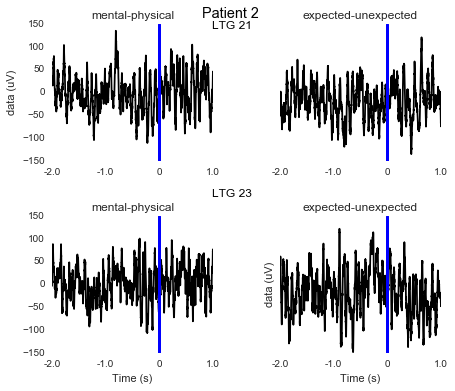

In [22]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6.5, 5.5);

TR_evoked_MP5.plot([8], axes=axes[0,0], show=False);
TR_evoked_EU5.plot([8], axes=axes[0,1], show=False);
TR_evoked_MP5.plot([10], axes=axes[1,0], show=False);
TR_evoked_EU5.plot([10], axes=axes[1,1], show=False);

axes[0,0].set_title("mental-physical")
axes[0,1].set_title("expected-unexpected")
axes[1,0].set_title("mental-physical")
axes[1,1].set_title("expected-unexpected")

plt.suptitle('Patient 2', color='black', size='x-large')
plt.figtext(0.46, 0.925, 'LTG 21', color='black', size='large')
plt.figtext(0.46, 0.5, 'LTG 23', color='black', size='large')

axes[0,0].set_xticks([-2000, -1000, 0, 1000])
axes[0,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[0,1].set_xticks([-2000, -1000, 0, 1000])
axes[0,1].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,0].set_xticks([-2000, -1000, 0, 1000])
axes[1,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,1].set_xticks([-2000, -1000, 0, 1000])
axes[1,1].set_xticklabels([-2.0, -1.0, 0, 1.0])

axes[0,0].set_axis_bgcolor('white')
axes[0,1].set_axis_bgcolor('white')
axes[1,0].set_axis_bgcolor('white')
axes[1,1].set_axis_bgcolor('white')

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("Time (s)")
axes[1,1].set_xlabel("Time (s)")

axes[0,1].set_yticks([])
axes[1,1].set_yticks([])
axes[0,1].set_ylabel("")
axes[1,0].set_ylabel("")

axes[0,0].axvline(x=0, linewidth=3)
axes[0,1].axvline(x=0, linewidth=3)
axes[1,0].axvline(x=0, linewidth=3)
axes[1,1].axvline(x=0, linewidth=3)

plt.savefig("F7-ERP Plots P2 Attention.pdf")

# Figure 8

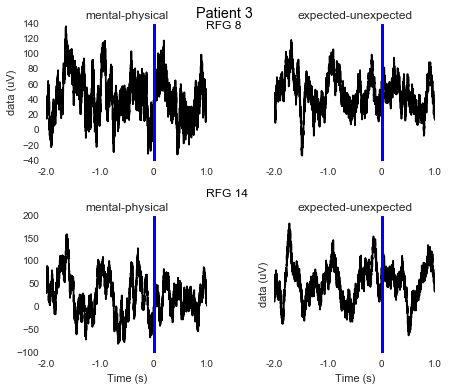

In [23]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6.5, 5.5);

TR_evoked_MP6.plot([3], axes=axes[0,0], show=False);
TR_evoked_EU6.plot([3], axes=axes[0,1], show=False);
TR_evoked_MP6.plot([6], axes=axes[1,0], show=False);
TR_evoked_EU6.plot([6], axes=axes[1,1], show=False);

axes[0,0].set_title("mental-physical")
axes[0,1].set_title("expected-unexpected")
axes[1,0].set_title("mental-physical")
axes[1,1].set_title("expected-unexpected")

plt.suptitle('Patient 3', color='black', size='x-large')
plt.figtext(0.46, 0.925, 'RFG 8', color='black', size='large')
plt.figtext(0.46, 0.5, 'RFG 14', color='black', size='large')

axes[0,0].set_xticks([-2000, -1000, 0, 1000])
axes[0,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[0,1].set_xticks([-2000, -1000, 0, 1000])
axes[0,1].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,0].set_xticks([-2000, -1000, 0, 1000])
axes[1,0].set_xticklabels([-2.0, -1.0, 0, 1.0])
axes[1,1].set_xticks([-2000, -1000, 0, 1000])
axes[1,1].set_xticklabels([-2.0, -1.0, 0, 1.0])

axes[0,0].set_axis_bgcolor('white')
axes[0,1].set_axis_bgcolor('white')
axes[1,0].set_axis_bgcolor('white')
axes[1,1].set_axis_bgcolor('white')

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("Time (s)")
axes[1,1].set_xlabel("Time (s)")

axes[0,0].axvline(x=0, linewidth=3)
axes[0,1].axvline(x=0, linewidth=3)
axes[1,0].axvline(x=0, linewidth=3)
axes[1,1].axvline(x=0, linewidth=3)

axes[0,1].set_yticks([])
axes[1,1].set_yticks([])
axes[0,1].set_ylabel("")
axes[1,0].set_ylabel("")

plt.savefig("F8-ERP Plots P3 Attention.pdf")